In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. **Persiapan Data**

In [5]:
train_data_dir = '/content/Wound_dataset'
val_data_dir = '/content/val'

In [6]:
img_width, img_height = 224, 224
batch_size = 32

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
  # Tambahan augmentasi
    width_shift_range=0.2,  # Tambahan augmentasi
    height_shift_range=0.2,  # Tambahan augmentasi
    brightness_range=[0.8, 1.2],  # Tambahan augmentasi
    fill_mode='nearest'  # Tambahan augmentasi
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Load data training dan validasi dari direktori
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,

    class_mode='categorical'
)

Found 266 images belonging to 3 classes.
Found 53 images belonging to 3 classes.


# **2.** **Model Transfer** **Learning**

In [10]:
# Load model pre-trained (misalnya MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

In [11]:
# Tambahkan layer baru di atas base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # 3 kelas: Abrasions, Bruises, Burns

# Buat model baru
model = Model(inputs=base_model.input, outputs=predictions)

# **3. Training Model**

In [13]:
# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 20  # Kamu bisa mencoba nilai yang lebih besar
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples
 // batch_size
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3502 - loss: 1.6232 - val_accuracy: 0.4688 - val_loss: 1.3598
Epoch 2/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4062 - loss: 1.2853

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.4062 - loss: 1.2853 - val_accuracy: 0.7143 - val_loss: 0.7318
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6531 - loss: 0.9590
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 395ms/step - accuracy: 0.6250 - loss: 0.8859 - val_accuracy: 0.5625 - val_loss: 0.7663
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6659 - loss: 0.7198 - val_accuracy: 0.7619 - val_loss: 0.6521
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6250 - loss: 0.6843
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8105 - loss: 0.5326 - val_accuracy: 0.8750 - val_loss: 0.3986
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.8438 - loss: 0.4303 - val_accuracy: 0.8571 - val_loss: 0.4446
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8693 - loss: 0.4262
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.8125 - loss: 0.5477 - val_accuracy: 0.9375 - val_loss: 0.2918
Epoch 11/20


# **4. Fine-Tuning**

In [14]:
# Unfreeze beberapa layer terakhir dari base model
base_model.trainable = True
for layer in base_model.layers[-20:]:  # Sesuaikan jumlah layer yang di-unfreeze
    layer.trainable = True

# Compile model kembali dengan learning rate yang lebih kecil
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - accuracy: 0.8145 - loss: 0.4292 - val_accuracy: 0.9688 - val_loss: 0.1689
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.8438 - loss: 0.3798 - val_accuracy: 0.8095 - val_loss: 0.4684
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - accuracy: 0.8567 - loss: 0.4189
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.9062 - loss: 0.2999 - val_accuracy: 0.9375 - val_loss: 0.2037
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step - accuracy: 0.8705 - loss: 0.3821 - val_accuracy: 0.8571 - val_loss: 0.4716
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8750 - loss: 0.3612 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 8s/step - accuracy: 0.8816 - loss: 0.3566 - val_accuracy: 0.9375 - val_loss: 0.2780
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.9000 - loss: 0.3526 - val_accuracy: 0.8571 - val_loss: 0.3793
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - accuracy: 0.8920 - loss: 0.3143
Ep

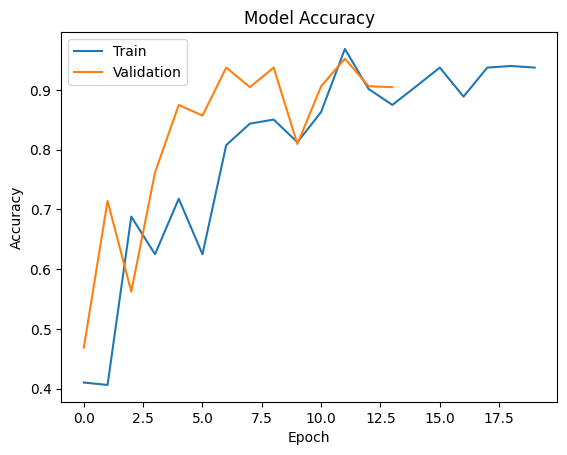

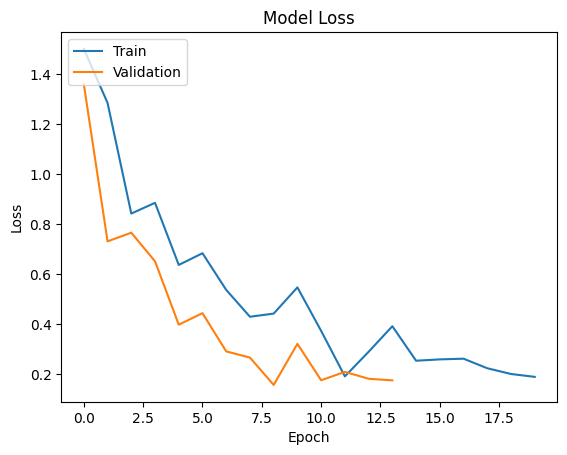

In [16]:
epochs_fine_tune = 50  # Kamu bisa mencoba nilai yang lebih besar
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs_fine_tune,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
model.save('INJUREAL.h5')